<a id='main' name="main"></a>
# Viral Data Analysis

Date: 2021.10.12

Author: © 2021 Titas Petravičius

This notebook is part of an individual project for [KTU IF](https://fi.ktu.edu/)  [P176M010 Advanced Machine Learning](https://admissions.ktu.edu/programme/m-software-engineering/#P176M010) class led by [M. Lukoševičius](http://mantas.info/).

Here we analyze open COVID-19 data from [Our World in Data](https://ourworldindata.org/) to answer the following questions:

1. Compare and visualise which countries has the max/mean/min case-to-death ratio
2. How does population density and median age correlate with the case-to-death ratio?
3. Is it possible to predict that a new Covid wave is coming? 


This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International license</a>. <a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons licencija" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a> 

## Load the data

In [2095]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import math
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler

Load the data

In [2096]:
df = pd.read_csv("owid-covid-data.csv")
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.155180e+05,115514.000000,114500.000000,1.047080e+05,104862.000000,114500.000000,114910.000000,114906.000000,113897.000000,104113.000000,...,84078.000000,82858.000000,54111.000000,97911.000000,115458.00000,107790.000000,4317.000000,4317.000000,4317.000000,4317.000000
mean,1.442717e+06,6459.248714,6481.215057,3.653402e+04,145.210400,132.390147,17855.885320,83.606383,83.596514,373.197676,...,10.591936,32.739730,50.737484,3.023284,73.26006,0.726469,28121.665323,8.044295,15.067498,693.703902
std,9.654443e+06,39341.305396,38946.830649,2.176770e+05,791.778483,740.916015,30366.503685,194.957229,163.961439,630.839522,...,10.504458,13.505874,31.753018,2.452775,7.54000,0.150211,82679.504077,15.902380,31.084306,1095.136854
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.001000,...,0.100000,7.700000,1.188000,0.100000,53.28000,0.394000,-31959.400000,-27.350000,-95.920000,-1728.844404
25%,2.001000e+03,3.000000,9.286000,6.800000e+01,0.000000,0.000000,347.769250,0.279000,1.550000,10.287000,...,1.900000,21.600000,19.351000,1.300000,67.92000,0.602000,-266.500000,-1.410000,-1.400000,-57.258399
50%,2.081050e+04,92.000000,115.000000,6.040000e+02,2.000000,1.714000,2731.115000,10.700500,14.732000,68.845000,...,6.300000,31.400000,49.839000,2.400000,74.62000,0.744000,1257.200000,4.400000,5.720000,248.143364
75%,2.144720e+05,926.000000,978.429000,5.206250e+03,19.000000,15.714000,21610.892500,81.451500,90.993000,451.613000,...,19.300000,41.100000,82.502000,3.861000,78.74000,0.848000,17284.800000,12.870000,21.210000,1157.952295
max,2.365120e+08,905948.000000,826439.429000,4.828340e+06,17977.000000,14722.857000,218643.211000,8620.690000,3385.473000,5982.089000,...,44.000000,78.100000,100.000000,13.800000,86.75000,0.957000,693243.800000,106.840000,372.950000,6096.707631


Check the columns available.

In [2097]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121744 entries, 0 to 121743
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code                                 121744 non-null  object 
 1   continent                                116202 non-null  object 
 2   location                                 121744 non-null  object 
 3   date                                     121744 non-null  object 
 4   total_cases                              115518 non-null  float64
 5   new_cases                                115514 non-null  float64
 6   new_cases_smoothed                       114500 non-null  float64
 7   total_deaths                             104708 non-null  float64
 8   new_deaths                               104862 non-null  float64
 9   new_deaths_smoothed                      114500 non-null  float64
 10  total_cases_per_million         

Let's see what different country codes we have:

In [2098]:
df.iso_code.unique()

array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'ABW', 'OWID_ASI', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD',
       'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES',
       'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
       'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL',
       'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP',
       'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'OWID_EUR', 'OWID_EUN', 'FRO',
       'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GTM', 'GGY', 'GIN', 'GNB',
       'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'OWID_INT',
       'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY',
       'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA',
       'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG

In [2099]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


The columns are explained [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).

# Data overview

Let's check if we have strong corelations which we could use later in the analysis.

In [2100]:
cols = [
    "iso_code",
    "continent",
    "date",
    "new_cases",
    "new_cases_smoothed",
    "new_deaths",
    "icu_patients",
    "hosp_patients",
    "human_development_index",
    "median_age",
    "population_density"
]
dfs = df[cols]

corr = dfs.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

/var/folders/vf/tl6z6zs57ssbc6ytw4crpt9r0000gn/T/ipykernel_904/1825831761.py:17: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(3)


,new_cases,new_cases_smoothed,new_deaths,icu_patients,hosp_patients,human_development_index,median_age,population_density
new_cases,1.000,0.987,0.932,0.904,0.887,0.038,0.034,-0.018
new_cases_smoothed,0.987,1.000,0.926,0.953,0.932,0.039,0.035,-0.018
new_deaths,0.932,0.926,1.000,0.872,0.890,0.037,0.032,-0.022
icu_patients,0.904,0.953,0.872,1.000,0.965,0.071,-0.062,-0.082
hosp_patients,0.887,0.932,0.890,0.965,1.000,0.016,-0.039,-0.087
human_development_index,0.038,0.039,0.037,0.071,0.016,1.000,0.899,0.181
median_age,0.034,0.035,0.032,-0.062,-0.039,0.899,1.000,0.152
population_density,-0.018,-0.018,-0.022,-0.082,-0.087,0.181,0.152,1.000


# 1. Compare and visualise which countries has the biggest cases to death percentage

Group the data and calculate Case-To-Death ratio (percentage)

In [2101]:
cdf = df.groupby('iso_code', as_index=False).last()
cdf["ctd_percent"] = cdf["total_deaths"] / cdf["total_cases"] * 100
cdf["hosp_patients"].loc[cdf["hosp_patients"].notna()].sum()

101260.0

Filter the data to exclude:
> * Any country that has less than 5000 total cases
> * Any country that has CTD (cases to death) ratio which is not between P10 and P90 quantile

In [2102]:
filtered_cdf = cdf.loc[(cdf.total_cases > 5000) & (cdf["iso_code"].str.len() == 3)]

# lower = filtered_cdf.ctd_percent.quantile(0.1)
# upper = filtered_cdf.ctd_percent.quantile(0.9)
# filtered_cdf = filtered_cdf[filtered_cdf.ctd_percent.between(lower, upper)]
print(f"Countries ommited '{len(cdf.index) - len(filtered_cdf.index)}' (out of total '{len(cdf.index)}')")

Countries ommited '59' (out of total '233')


Which countries has the biggest ratio?

In [2103]:
cols = ["continent","location", "total_cases", "total_deaths", "ctd_percent"]
dfc_sorted = filtered_cdf.sort_values('ctd_percent', ascending=False)
dfc_sorted[cols].head(10)


,continent,location,total_cases,total_deaths,ctd_percent
229,Asia,Yemen,9271.0,1763.0,19.016287
167,South America,Peru,2181183.0,199559.0,9.149118
127,North America,Mexico,3691924.0,279896.0,7.581304
181,Africa,Sudan,38665.0,2909.0,7.523600
200,Asia,Syria,35898.0,2306.0,6.423756
57,South America,Ecuador,511317.0,32819.0,6.418523
58,Africa,Egypt,309135.0,17545.0,5.675514
189,Africa,Somalia,20900.0,1152.0,5.511962
214,Asia,Taiwan,16267.0,844.0,5.188418
112,Africa,Liberia,5799.0,286.0,4.931885


Which countries has the lowest ratio?

In [2104]:
dfc_sorted[cols].tail(10)

,continent,location,total_cases,total_deaths,ctd_percent
49,Europe,Cyprus,120761.0,557.0,0.461242
148,Europe,Norway,192079.0,871.0,0.453459
134,Asia,Mongolia,319247.0,1391.0,0.435713
6,Asia,United Arab Emirates,737229.0,2107.0,0.285800
95,Europe,Iceland,12035.0,33.0,0.274200
126,Asia,Maldives,85278.0,232.0,0.272051
176,Asia,Qatar,237147.0,606.0,0.255538
13,Africa,Burundi,18825.0,38.0,0.201859
183,Asia,Singapore,113381.0,133.0,0.117304
110,Asia,Laos,26462.0,23.0,0.086917


Which countries has `average` case-to-death ratio?

In [2105]:
mid = round(len(dfc_sorted)/2)
dfc_sorted[cols].iloc[mid-5:mid+5]

,continent,location,total_cases,total_deaths,ctd_percent
120,Europe,Latvia,164801.0,2773.0,1.682635
172,Europe,Portugal,1072537.0,18008.0,1.679010
102,Asia,Kazakhstan,974944.0,16264.0,1.668198
188,Europe,San Marino,5460.0,91.0,1.666667
62,Africa,Ethiopia,351338.0,5843.0,1.663071
66,Europe,France,7310355.0,120079.0,1.642588
195,Europe,Slovenia,298274.0,4899.0,1.642450
219,North America,United States,44058827.0,707781.0,1.606445
180,Asia,Saudi Arabia,547402.0,8732.0,1.595171
38,Africa,Cameroon,95399.0,1517.0,1.590163


What is ratio distribution?

Text(0.5, 0, 'CTD Percentage')

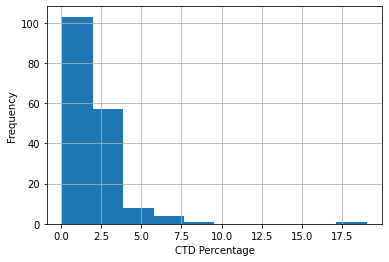

In [2106]:
ax = dfc_sorted['ctd_percent'].plot.hist(grid=True)
ax.set_xlabel("CTD Percentage")

What about world CTD ratio? How it changed over time?

<AxesSubplot:>

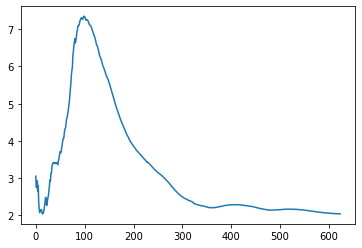

In [2107]:
wrld_df = df.loc[df.iso_code == "OWID_WRL"].reset_index(drop=True)
wrld_df["ctd_percent"] = wrld_df["total_deaths"] / wrld_df["total_cases"] * 100
wrld_ctd_sr = wrld_df["ctd_percent"] 
wrld_ctd_sr.plot(x='date', y='ctd_percent')

# 2. How does population density and median age correlate with the case-to-death ratio?

Prepare the data by:
   * Grouping data by `iso_code` and retrieving last data point
   * Removing all countries that has `total_cases < 5000` 

In [2108]:
dfl = df.groupby('iso_code', as_index=False).last()
dfl = dfl[dfl.total_cases > 5000]
dfl = dfl.loc[dfl["iso_code"].str.len() == 3]

Calculate case-to-death (CTD) ratio:

In [2109]:
dfl["ctd_percent"] = dfl["total_deaths"] / dfl["total_cases"] * 100

Define helper func for correlation analysis:

In [2110]:
def show_correlation(x, y, xlabel = None, ylabel = None):
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(x, y, '.')

    msk = ~np.isnan(x) & ~np.isnan(y)
    c1, c2 = np.polyfit(x[msk], y[msk],1)
    cy = c1*x + c2
    ax.plot(x, cy)
    ax.legend(["Country", "Correlation"])
    if xlabel != None:
        ax.set_xlabel(xlabel)
    if ylabel != None:
        ax.set_ylabel(ylabel)

## 2.1. Primary `population_density` and `median_age` correlation with `ctd_percentage` analysis

### 2.1.1. `population_density` -> `ctd_percent` correlation

-> Correlation: -0.11793998846544969


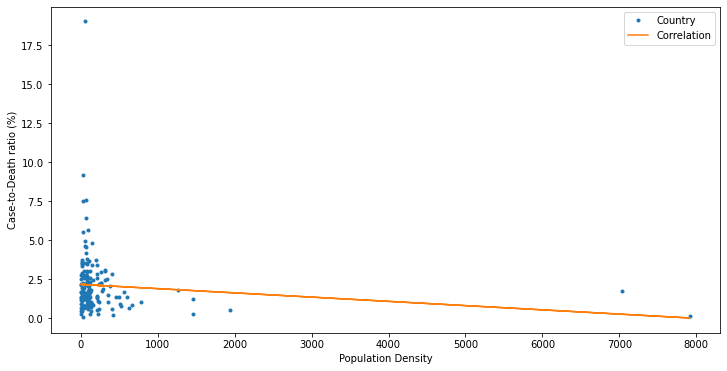

In [2111]:
x = dfl.population_density
y = dfl.ctd_percent

show_correlation(x,y, "Population Density", "Case-to-Death ratio (%)")
print('-> Correlation:', x.corr(y))

### 2.1.2. `median_age` -> `ctd_percent` correlation

-> Correlation: -0.15422819282645361


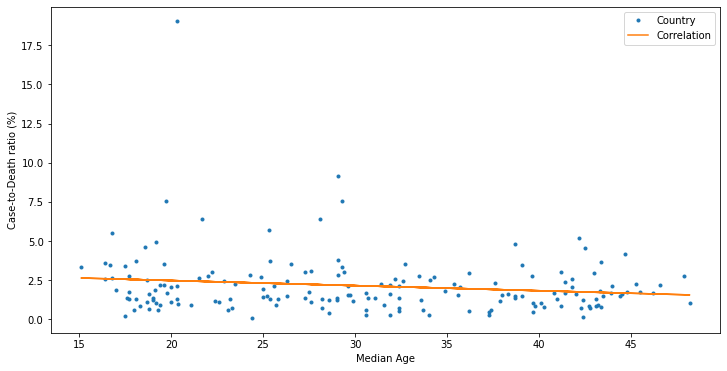

In [2112]:
x = dfl.median_age
y = dfl.ctd_percent

show_correlation(x,y, "Median Age", "Case-to-Death ratio (%)")
print('-> Correlation:', x.corr(y))

## 2.2. Initial results

Surprisingly, we see that:
  * `population_density` -> `ctd_percent` has a negative correlation coefficient of `-0.11793998846544969`
  * `median_age` -> `ctd_percent` has a negativ ecorrelation coefficient of `-0.15422819282645361`

This indicates that higher population density and higher median age of a country has positive effects on its **Case To Death** ratio.

## 2.3. Hypothesis

While this might be strange initially, it might be the cause of other variables such as:
  * People in more rural areas has less access to hospitals
  * Countries which are more rural has lower `human_development_index (HDI)`
  * People only go to hospital and gets tested only if the condition is serious and as a result **CTD** is higher
  * Countries with lower `HDI` are testing less (per thousand) and as a result their **CTD** is higher, because only serious cases gets tested
  * The higher median age, the more "developed" country is and affects previously mentioned variables 

## 2.4. Hypothesis validation

To validate our hypothesis, we need to further evaluate if:
  * `population_density` positively correlates with `human_development_index` 
  * `median_age` positively correlates with `human_development_index` 
  * `human_development_index` positively correlates with `total_tests_per_thousand`.

### 2.4.1. Variable correlation

Plot `population_density` and `human_development_index` correlation:

-> Correlation: 0.18468826277514697


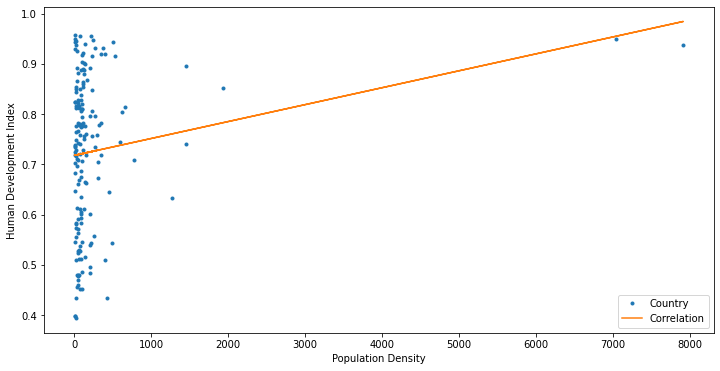

In [2113]:
x = dfl.population_density
y = dfl.human_development_index

show_correlation(x,y, "Population Density", "Human Development Index")
print("-> Correlation:", x.corr(y))

Plot `median_age` and `human_development_index` correlation:

-> Corellation: 0.900618490506699


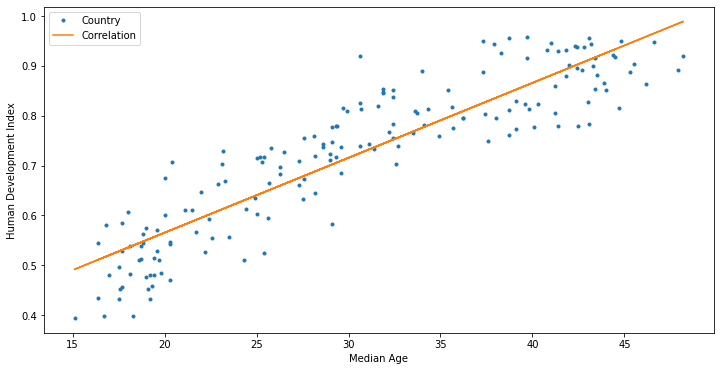

In [2114]:
x = dfl.median_age
y = dfl.human_development_index
show_correlation(x,y, "Median Age", "Human Development Index")
print("-> Corellation:", x.corr(y))

Plot `human_development_index` and `total_tests_per_thousand` correlation:

-> Corellation: 0.4514781729220483


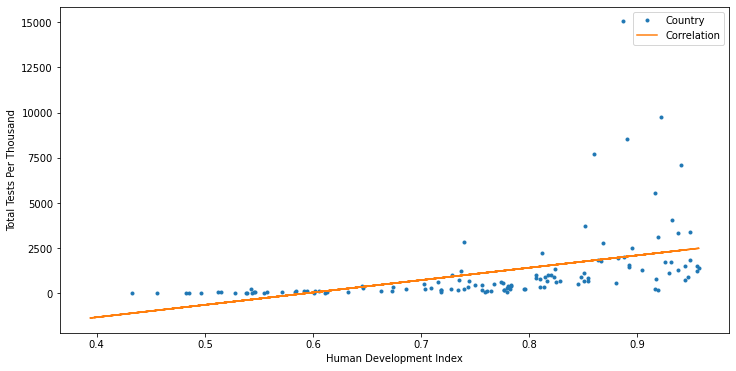

In [2115]:
x = dfl.human_development_index
y = dfl.total_tests_per_thousand
show_correlation(x,y, "Human Development Index", "Total Tests Per Thousand")
print("-> Corellation:", x.corr(y))

Plot `total_tests_per_thousand` and `ctd_percent` correlation:

-> Corellation: -0.2507864141136669


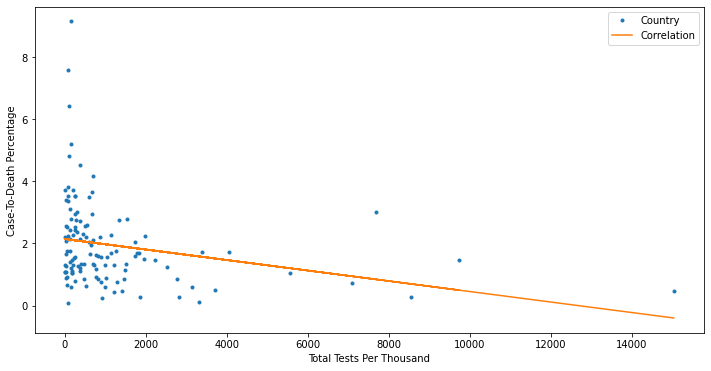

In [2116]:
x = dfl.total_tests_per_thousand
y = dfl.ctd_percent
show_correlation(x,y, "Total Tests Per Thousand", "Case-To-Death Percentage")
print("-> Corellation:", x.corr(y))

### 2.4.2. Results

In [2117]:
cols = ["continent", "location", "total_cases", "total_deaths", "ctd_percent", "population_density", "human_development_index", "total_tests_per_thousand"]
dfl_sorted = dfl.sort_values('population_density', ascending=False)
dfl_sorted[cols].head(15)

,continent,location,total_cases,total_deaths,ctd_percent,population_density,human_development_index,total_tests_per_thousand
183,Asia,Singapore,113381.0,133.0,0.117304,7915.731,0.938,3317.203
84,Asia,Hong Kong,12244.0,213.0,1.739628,7039.714,0.949,3387.812
20,Asia,Bahrain,275394.0,1390.0,0.504731,1935.907,0.852,3721.785
126,Asia,Maldives,85278.0,232.0,0.272051,1454.433,0.740,2819.170
131,Europe,Malta,37264.0,459.0,1.231752,1454.037,0.895,2516.900
18,Asia,Bangladesh,1560155.0,27635.0,1.771298,1265.036,0.632,58.846
174,Asia,Palestine,439845.0,4438.0,1.008992,778.202,0.708,NaN
28,North America,Barbados,9823.0,85.0,0.865316,664.463,0.814,NaN
138,Africa,Mauritius,16083.0,100.0,0.621775,622.962,0.804,NaN
111,Asia,Lebanon,627722.0,8370.0,1.333393,594.561,0.744,698.962


In [2118]:
dfl_sorted.head(15)[cols].describe()

,total_cases,total_deaths,ctd_percent,population_density,human_development_index,total_tests_per_thousand
count,1.500000e+01,15.000000,15.000000,15.000000,14.000000,11.000000
mean,2.636880e+06,34364.000000,1.031188,1750.900800,0.794571,1652.507909
std,8.668392e+06,115222.662054,0.515349,2373.859546,0.130226,1481.212859
min,5.460000e+03,85.000000,0.117304,450.419000,0.543000,58.846000
25%,2.667350e+04,173.000000,0.701306,542.317000,0.716000,338.066000
50%,1.133810e+05,1296.000000,1.008992,664.463000,0.809000,764.674000
75%,5.337835e+05,6404.000000,1.330312,1454.235000,0.910750,3068.186500
max,3.389431e+07,449856.000000,1.771298,7915.731000,0.949000,3721.785000


In [2119]:
dfl_sorted[cols].tail(15)

,continent,location,total_cases,total_deaths,ctd_percent,population_density,human_development_index,total_tests_per_thousand
32,Africa,Central African Republic,11391.0,100.0,0.877886,7.479,0.397,NaN
102,Asia,Kazakhstan,974944.0,16264.0,1.668198,6.681,0.825,629.908
136,Africa,Mauritania,36271.0,782.0,2.155992,4.289,0.546,53.252
31,Africa,Botswana,180197.0,2374.0,1.317447,4.044,0.735,720.992
33,North America,Canada,1655406.0,28165.0,1.701395,4.037,0.929,1149.924
83,South America,Guyana,32951.0,816.0,2.476404,3.952,0.682,NaN
113,Africa,Libya,343932.0,4720.0,1.372364,3.623,0.724,NaN
193,South America,Suriname,42716.0,919.0,2.151419,3.612,0.738,NaN
95,Europe,Iceland,12035.0,33.0,0.274200,3.404,0.949,1866.152
10,Oceania,Australia,120042.0,1389.0,1.157095,3.202,0.944,1497.111


In [2120]:
dfl_sorted[cols].tail(15).describe()

,total_cases,total_deaths,ctd_percent,population_density,human_development_index,total_tests_per_thousand
count,1.500000e+01,15.000000,15.000000,12.000000,14.000000,10.000000
mean,2.614233e+05,4250.200000,2.068398,4.115083,0.703714,755.797900
std,4.594574e+05,7742.142101,1.686369,1.520663,0.175799,650.543406
min,1.139100e+04,33.000000,0.274200,1.980000,0.397000,14.451000
25%,2.460900e+04,799.000000,1.115915,3.353500,0.586750,177.462750
50%,4.271600e+04,1389.000000,1.668198,3.787500,0.729500,675.450000
75%,2.497220e+05,2947.000000,2.316198,4.105250,0.803250,1193.742000
max,1.655406e+06,28165.000000,6.423756,7.479000,0.949000,1866.152000


---

As we can see:
  * `population_density` and `median_age` both has positive correlation with `human_development_index`
  * `human_development_index` has strong correlation with `total_tests_per_thousand` (~0.45)
  * `total_tests_per_thousand` has pretty strong negative correlation with `ctd_percent` (Case-To-Death percentage)

# 3. Is it possible to predict that a new Covid wave is coming? 

Import needed libs:

In [2121]:
# For formatting X-axis
from matplotlib.dates import MonthLocator 

# For finding peaks and valleys of covid waves
from scipy.signal import savgol_filter
from findpeaks import findpeaks

First lets see how `LTU` `new_cases` data looks like:

Raw LTU new case data:


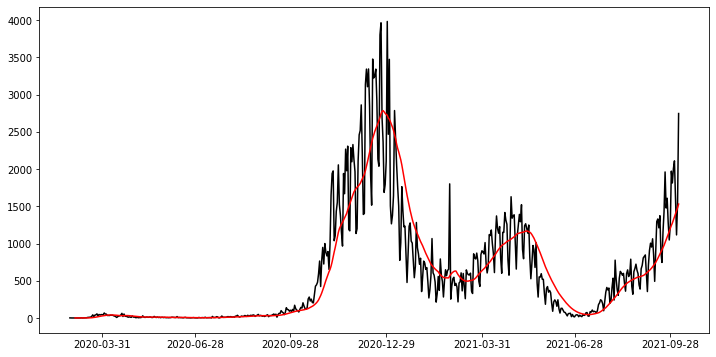

In [2122]:
lt_df = df.loc[df.iso_code == "LTU"]
fig, ax = plt.subplots(figsize=(12,6))
ax.xaxis.set_major_locator(MonthLocator(interval=3))
ax.plot(lt_df.date, lt_df.new_cases, 'black') 
ax.plot(lt_df.date, lt_df.new_cases_smoothed.ewm(span=14).mean(), 'r') 
print("Raw LTU new case data:")

As we can see this is hard to work with and is "too random" because of different testing quantities during normal work days and weekend.

To solve this, lets:
  * Smoothen it out using `savgol_filter` using `61` window and `2nd` degree polynomial
  * Check how it compares against `14 day` rolling average

Define helper for plotting country peaks and valleys:

In [2123]:
def country_pv_df(df:pd.DataFrame, country: str):
    cdf = df.loc[df.iso_code == country]

    cdf["new_cases_14d_ewm"] = cdf.new_cases.ewm(span=14).mean()

    ax.plot(cdf.date, cdf.new_cases_14d_ewm, 'y') # Plot 14day rolling average (just for curiosity)
    y = savgol_filter(cdf.new_cases_14d_ewm, 61, 2)

    ax.plot(cdf.date, y, 'g')

    # Find Valleys-Peaks
    fp = findpeaks(lookahead=60, interpolate=10, denoise=10)
    pv_df = fp.fit(y)['df']
    return pv_df.loc[(pv_df.peak == True) | (pv_df.valley == True)]

def df_pv(df:pd.DataFrame, col_name="new_cases"):
    df["new_cases_14d_ewm"] = df[col_name].ewm(span=14).mean()
    y = savgol_filter(df.new_cases_14d_ewm, 61, 2)
    fp = findpeaks(lookahead=60, interpolate=10, denoise=10)
    pv_df = fp.fit(y)['df']
    return pv_df.loc[(pv_df.peak == True) | (pv_df.valley == True)]


def plot_country_pv(df:pd.DataFrame, country: str):
    fig, ax = plt.subplots(figsize=(12,6))
    ax.xaxis.set_major_locator(MonthLocator(interval=3))

    cdf = df.loc[df.iso_code == country]

    cdf["new_cases_14d_ewm"] = cdf.new_cases.ewm(span=14).mean()
    cdf["new_cases_14d_ewm"] = cdf["new_cases_14d_ewm"]

    ax.plot(cdf.date, cdf.new_cases_14d_ewm, 'y') # Plot 14day rolling average (just for curiosity)
    y = savgol_filter(cdf.new_cases_14d_ewm, 61, 2)

    ax.plot(cdf.date, y, 'g')

    # Find Valleys-Peaks
    # fp = findpeaks(lookahead=60, interpolate=10, denoise=10)
    fp = findpeaks(method='caerus', params={'minperc':10})
    fp_df = fp.fit(y)['df']

    peaks = fp_df.loc[fp_df.peak == True]
    valleys = fp_df.loc[fp_df.valley == True]

    # Plot Peaks/Valleys
    ax.plot(peaks.x, peaks.y, 'or')
    ax.plot(valleys.x, valleys.y, 'xb')
    ax.legend(["New Cases (14d. EWMA)", "New Cases (EWMA+SavGol_Filter)", "Peak", "Valley", "Prediction Point", "Prediction Target"])
    ax.set_title(cdf.iloc[-1].location)

    return fp_df




Lets see how well it finds peaks and valleys of different countries:

[findpeaks] >Finding peaks in 1d-vector using [caerus] method..


100%|██████████| 48/48 [00:00<00:00, 1094.46it/s]


[findpeaks] >Finding peaks in 1d-vector using [caerus] method..


100%|██████████| 48/48 [00:00<00:00, 1123.33it/s]


[findpeaks] >Finding peaks in 1d-vector using [caerus] method..


100%|██████████| 48/48 [00:00<00:00, 1129.86it/s]


[findpeaks] >Finding peaks in 1d-vector using [caerus] method..


100%|██████████| 48/48 [00:00<00:00, 1121.07it/s]


,labx,peak,valley,y,x
0,0,False,False,27.402495,0
1,1,False,False,22.511651,1
2,1,False,False,17.915481,2
3,1,False,False,13.613984,3
4,1,False,False,9.607162,4
...,...,...,...,...,...
609,0,False,False,666.555136,609
610,0,False,False,639.093855,610
611,0,False,False,610.570397,611
612,0,False,False,580.984761,612


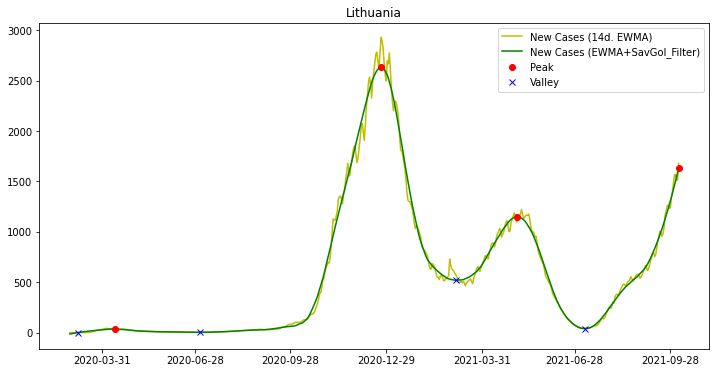

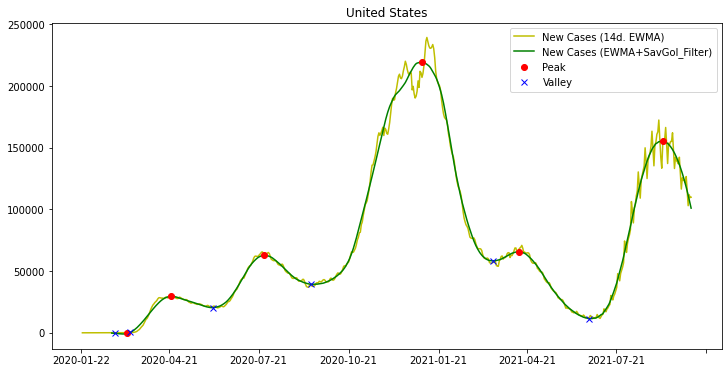

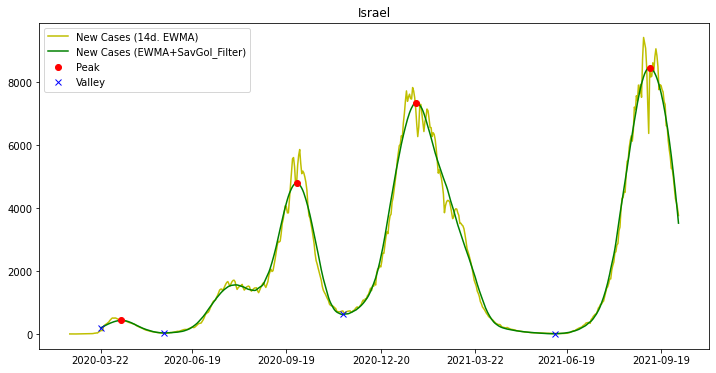

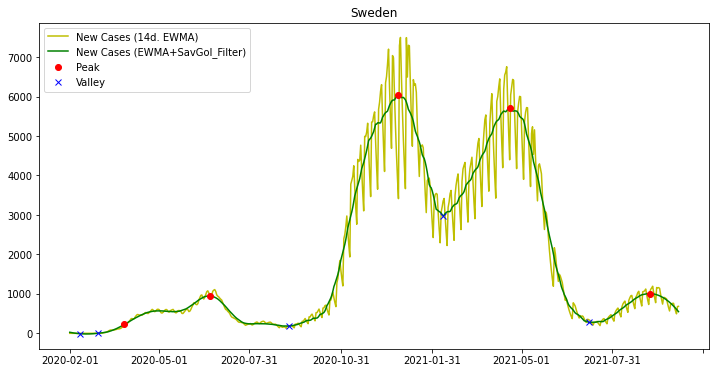

In [2124]:
plot_country_pv(df, "LTU")
plot_country_pv(df, "USA")
plot_country_pv(df, "ISR")
plot_country_pv(df, "SWE")

Process data and aggregate additional variable for "look behind":

In [2125]:
def process_data(X: pd.DataFrame):
    pv = df_pv(X).reset_index(drop=True)

    X["next_peak"] = 0
    X["previous_peak"] = 0

    aggregated_cols = [
        'new_cases_smoothed_per_million_t7',
        'new_deaths_smoothed_per_million_t7',
        'new_cases_smoothed_per_million_t14',
        'new_deaths_smoothed_per_million_t14',
        'new_cases_smoothed_per_million_t30',
        'new_deaths_smoothed_per_million_t30',
    ]

    X[aggregated_cols] = 0

    valley_df = pv.loc[pv.valley == True].reset_index(drop=True)
    peak_df = pv.loc[pv.peak == True].reset_index(drop=True)

    peak_idx = 0
    valley_idx = 0
    idx = 0
    for row in X.iterrows():
        if idx > 7:
            t = X.iloc[idx-7]
            X.at[idx, 'new_cases_smoothed_per_million_t7'] = t.new_cases_smoothed_per_million
            X.at[idx, 'new_deaths_smoothed_per_million_t7']  = t.new_deaths_smoothed_per_million
        if idx > 14:
            t = X.iloc[idx-14]
            X.at[idx, 'new_cases_smoothed_per_million_t14'] = t.new_cases_smoothed_per_million
            X.at[idx, 'new_deaths_smoothed_per_million_t14']  = t.new_deaths_smoothed_per_million
        if idx > 30:
            t = X.iloc[idx-30]
            X.at[idx, 'new_cases_smoothed_per_million_t30'] = t.new_cases_smoothed_per_million
            X.at[idx, 'new_deaths_smoothed_per_million_t30']  = t.new_deaths_smoothed_per_million

        if peak_idx < len(peak_df):
            if peak_idx > 0:
                X.at[idx, 'previous_peak'] = idx - peak_df.iloc[peak_idx - 1].x    

            next_peak = peak_df.iloc[peak_idx].x - idx
            X.at[idx, 'next_peak'] = next_peak
            if next_peak == 0:
                peak_idx += 1
        
        idx += 1

    return X

[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
[findpeaks] >Interpolating 1d-vector by factor 10
[[-0.23019653 -0.23988596 -0.07617101 ...  0.09187823 -0.01504599
  -0.26990469]
 [ 2.93973348  2.04898434  1.72302848 ...  2.07499241  1.68348989
   0.51461827]
 [-0.17417325 -0.35067438 -0.67039093 ... -0.70136745 -0.66832902
   0.12235679]
 ...
 [-1.04116503 -1.12870864 -1.32834931 ... -1.09799029 -1.01130261
  -1.05442764]
 [-0.55007684 -0.6106554   0.44704911 ... -1.09799029 -1.01130261
  -1.05442764]
 [ 0.71584621  1.24099358  2.4390776  ...  2.47161525  2.52186977
   2.08366418]]
Score: 0.9998186010368103
[findpeaks] >Finding peaks in 1d-vector using [caerus] method..


100%|██████████| 48/48 [00:00<00:00, 1166.07it/s]


ypred: [154.]
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
[findpeaks] >Interpolating 1d-vector by factor 10
[findpeaks] >Finding peaks in 1d-vector using [caerus] method..


100%|██████████| 48/48 [00:00<00:00, 1198.47it/s]


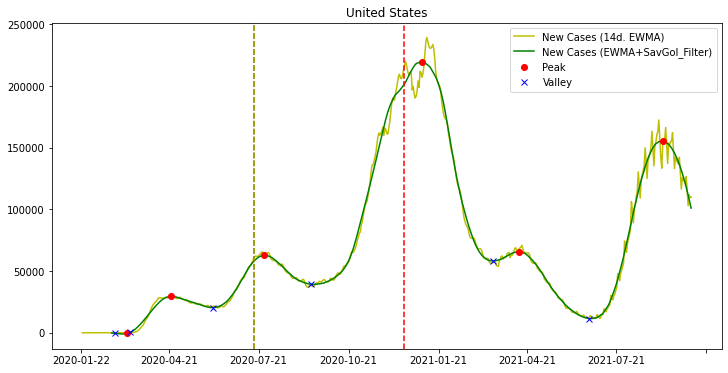

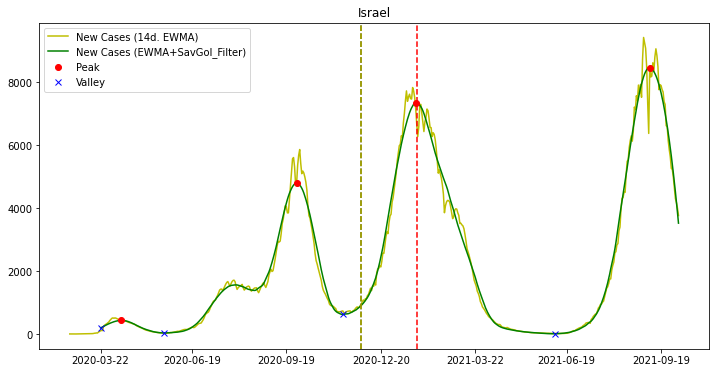

In [2126]:

df = pd.read_csv("owid-covid-data.csv")
cols = [
    "new_cases",
    "new_cases_smoothed_per_million",
    "new_deaths_smoothed_per_million"
]

cdf = df.loc[df.iso_code == "USA"].reset_index(drop=True)
X = cdf[cols]
X = X.fillna(0)
X = X.dropna()
X = process_data(X)
y = X['next_peak']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=3321)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_train = pd.DataFrame(X_train)

print(X_test)

reg = DecisionTreeRegressor(random_state=145)

reg = reg.fit(X_train, y_train)
score = reg.score(X_test, y_test)
print("Score:",score)



plot_country_pv(df, "USA")

predict_at = 176
plt.axvline(x=predict_at, color='k', linestyle='--')
y_pred = reg.predict([X_test[predict_at]])
plt.axvline(x=predict_at, color='y', linestyle="--")
plt.axvline(x=predict_at+y_pred[0], color='r', linestyle="--")

print("ypred:",y_pred)




# Predict for ISRAEL
cdf = df.loc[df.iso_code == "ISR"].reset_index(drop=True)
X = cdf[cols]
X = X.fillna(0)
X = X.dropna()
X = process_data(X)

y = X['next_peak']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.9, random_state=3321)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_train = pd.DataFrame(X_train)

plot_country_pv(df, "ISR")
predict_at = 285
plt.axvline(x=predict_at, color='k', linestyle='--')
y_pred = reg.predict([X_test[predict_at]])
plt.axvline(x=predict_at, color='y', linestyle="--")
plt.axvline(x=predict_at+y_pred[0], color='r', linestyle="--")



    

Yellow dashed line indicates prediction point and red dashed line indicates where the algorithm predicts that the new wave will peak. 

> Initial idea was to use LSTM to forecast curve and evaluate when it will peak/valley, however due to lack of time I've implemented "dummy" solution with DecisionTree :(